### 패키지

In [39]:
# 분석
import pandas as pd
import numpy as np

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "NanumGothic"

# 머신러닝 패키지
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

### 데이터셋

In [40]:
df = pd.read_csv("./data/만료및탈퇴회원.csv", index_col=0)
df

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_activeday_count,test_count,test_average_score,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm
0,008c6dd3-23f5-47f2-bf12-786243927bd5,F,초등,초6,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
1,027a7135-be16-4574-a826-5e4b34eed8a0,M,초등,초6,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
2,02e998fc-1b98-485b-87ca-4e1ef40637f3,M,초등,초2,44,학습생(만료),"01,44",0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
3,0342a5d3-2b88-42ee-ba65-665af2cb48c3,F,초등,초3,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,9
4,03b8bdcb-699f-4632-a2f2-90da954b34ac,M,초등,초5,44,학습생(만료),"-,00,01,44",3,0,15,...,1.0,1.0,100.0,1.0,1.0,NaN,NaN,NaN,2022,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111846,fe0e970c-f546-4d32-8d15-a77889d1da78,M,초등,초5,44,학습생(만료),"11,44",0,0,0,...,6.0,10.0,71.0,59.0,46.0,NaN,NaN,NaN,2022,11
111847,fe10a0fd-b106-47a9-9440-4499e7bc42c7,M,초등,초3,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11
111848,ff02ec2b-0152-4028-b72f-79a6d78485b6,F,초등,초5,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11
111849,ff64565a-53f8-4362-8376-32432a231566,F,초등,초4,44,학습생(만료),44,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11


### 탐색

In [41]:
for i in df.columns:
    print(i)

userid
gender
membertype_codename
grade_codename
memberstatus
memberstatus_codename
memberstatus_change
status_null_count
statusgroup_10_count
statusgroup_20_count
statusgroup_30_count
statusgroup_40_count
statusgroup_50_count
statusgroup_90_count
point_gain_activeday_count
point_gain_count
point_gain
point_loss_activeday_count
point_loss_count
point_loss
tablet_activeday_count
tablet_moved_menu_count
tablet_leave_count
tablet_resume_count
tablet_login_count
tablet_logout_count
study_activeday_count
study_count
study_notcompleted_count
study_completed_count
study_restart_count
total_system_learning_time
total_caliper_learning_time
media_activeday_count
media_count
video_action_count
video_start_count
video_restart_count
video_pause_count
video_jump_count
video_resume_count
video_speed_count
video_volume_count
video_end_count
test_activeday_count
test_count
test_average_score
test_item_count
test_correct_count
wrong_count
wrong_item_count
wrong_correct_count
yyyy
mm


형태

In [42]:
df.shape

(111851, 54)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111851 entries, 0 to 111850
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   userid                       111851 non-null  object 
 1   gender                       111851 non-null  object 
 2   membertype_codename          111851 non-null  object 
 3   grade_codename               111851 non-null  object 
 4   memberstatus                 111851 non-null  int64  
 5   memberstatus_codename        111851 non-null  object 
 6   memberstatus_change          111851 non-null  object 
 7   status_null_count            111851 non-null  int64  
 8   statusgroup_10_count         111851 non-null  int64  
 9   statusgroup_20_count         111851 non-null  int64  
 10  statusgroup_30_count         111851 non-null  int64  
 11  statusgroup_40_count         111851 non-null  int64  
 12  statusgroup_50_count         111851 non-null  int64  
 13  stat

결측치

In [44]:
df.isnull().sum()

userid                              0
gender                              0
membertype_codename                 0
grade_codename                      0
memberstatus                        0
memberstatus_codename               0
memberstatus_change                 0
status_null_count                   0
statusgroup_10_count                0
statusgroup_20_count                0
statusgroup_30_count                0
statusgroup_40_count                0
statusgroup_50_count                0
statusgroup_90_count                0
point_gain_activeday_count       3955
point_gain_count                 3955
point_gain                       3955
point_loss_activeday_count       3955
point_loss_count                 3955
point_loss                       3955
tablet_activeday_count          69893
tablet_moved_menu_count         69893
tablet_leave_count              69893
tablet_resume_count             69893
tablet_login_count              69893
tablet_logout_count             69893
study_active

중복값

In [45]:
df.duplicated().sum()

0

### 전처리

편의상 만료는 0,미납은 1, 탈퇴는 2로 처리

In [46]:
df["memberstatus"][df["memberstatus"] == 44] = 0
df["memberstatus"][df["memberstatus"] == 66] = 1
df["memberstatus"][df["memberstatus"] == 88] = 2

C:\Users\dongi\AppData\Local\Temp\ipykernel_13128\3595501481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["memberstatus"][df["memberstatus"] == 44] = 0
C:\Users\dongi\AppData\Local\Temp\ipykernel_13128\3595501481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["memberstatus"][df["memberstatus"] == 66] = 1
C:\Users\dongi\AppData\Local\Temp\ipykernel_13128\3595501481.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

키즈~중1까지로 데이터셋을 정리

In [47]:
df_under = df[
    (df["grade_codename"] == "키즈")
    | (df["grade_codename"] == "초1")
    | (df["grade_codename"] == "초2")
    | (df["grade_codename"] == "초3")
    | (df["grade_codename"] == "초4")
    | (df["grade_codename"] == "초5")
    | (df["grade_codename"] == "초6")
    | (df["grade_codename"] == "중1")
]

결측치 처리

In [48]:
df_under = df_under.fillna(0)

### EDA

In [49]:
# 전체 대상
df_status = df.loc[:, "statusgroup_10_count":"statusgroup_90_count"]
df_status["memberstatus"] = df["memberstatus"]

In [50]:
# plt.figure(figsize=(14, 12))
# ax = sns.countplot(data=df, y="grade_codename", hue="memberstatus")
# plt.title("연령대별 회원상태 누적그래프")

# plt.show()

In [51]:
df_under_status = df_under.loc[:, "statusgroup_10_count":"statusgroup_90_count"]
df_under_status["memberstatus"] = df_under["memberstatus"]

In [52]:
# plt.figure(figsize=(10, 6))
# ax = sns.countplot(data=df_under, y="grade_codename", hue="memberstatus")
# plt.title("키즈~중1까지 회원상태별 누적 그래프")

# plt.show()

In [53]:
remain_days = {
    "임시회원 일수": df_under["statusgroup_10_count"].mean(),
    "무료회원 일수": df_under["statusgroup_20_count"].mean(),
    "유료회원 일수": df_under["statusgroup_30_count"].mean(),
    "중지회원 일수": df_under["statusgroup_40_count"].mean(),
    "만료회원 일수": df_under["statusgroup_50_count"].mean(),
    "해지회원 일수": df_under["statusgroup_90_count"].mean(),
}

c:\Users\dongi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
c:\Users\dongi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dongi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dongi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dongi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: Us

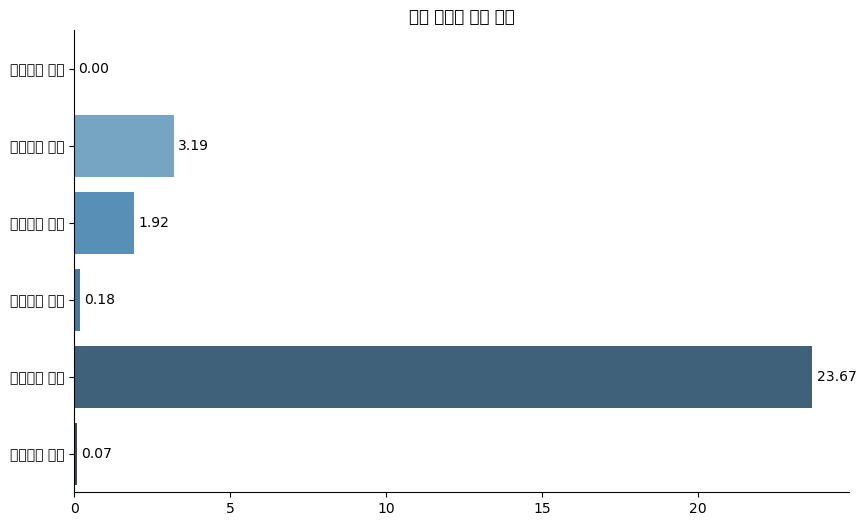

In [54]:
categories = list(remain_days.keys())
values = list(remain_days.values())

# 막대그래프 생성
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=values, y=categories, palette="Blues_d")

# 막대 라벨을 끝에 넣기
ax.bar_label(ax.containers[0], fmt="%.2f", label_type="edge", padding=3)

# 그래프 제목 설정
plt.title("회원 상태별 평균 일수")

# 오른쪽과 위쪽의 축 숨김
plt.gca().spines[["right", "top"]].set_visible(False)

# 그래프 출력
plt.show()

c:\Users\dongi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
c:\Users\dongi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dongi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canva

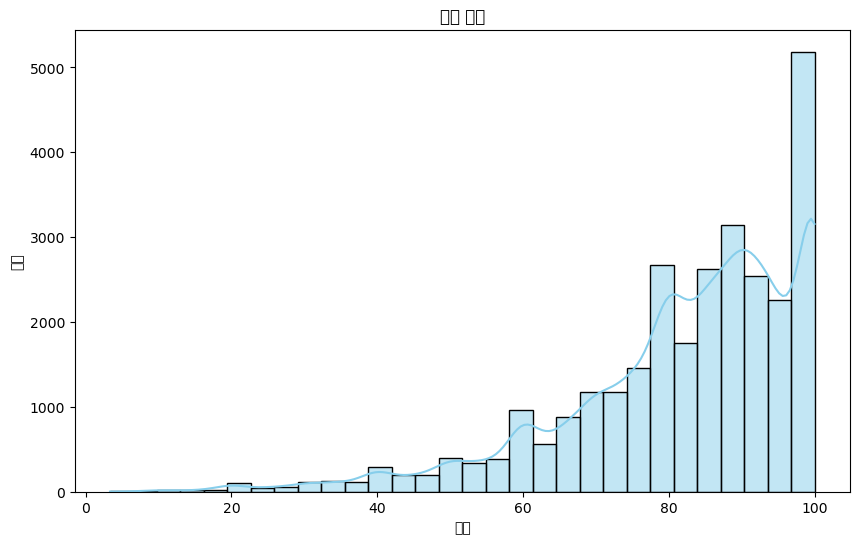

In [55]:
scores = df_under["test_average_score"][
    df_under["test_average_score"] > 0
]  # '점수컬럼이름'을 실제 점수 컬럼 이름으로 교체하세요.

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 히스토그램과 커널 밀도 추정(KDE) 그래프 그리기
sns.histplot(scores, kde=True, color="skyblue", bins=30)

# 그래프 제목과 레이블 설정
plt.title("점수 분포")
plt.xlabel("점수")
plt.ylabel("빈도")

# 그래프 출력
plt.show()

### 데이터분석

- 아이디어1. 만료 유지일 예측모델 만들기 -> 만료일이 길어질수록 다른 서비스를 알아보는 것이라 생각할 수 있고 그 전에 다시 회원으로 돌려야함.

- 만료일을 길게 유지하게 하는 것은 무엇일까?
- 만료 회원 일수 평균이 23.67정도임으로 24일 이상은 장기 만료 상태, 이하는 비장기로 구분하고 각각 0,1로 그룹핑

#### 데이터추가전처리

만료일수가 0이상인 사람들로 구성된 새로운 데이터 프레임 생성

In [56]:
df_under_50 = df_under[df_under["statusgroup_50_count"] > 0]
df_under_50["target"] = 0
df_under_50["target"]

C:\Users\dongi\AppData\Local\Temp\ipykernel_13128\4057735998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_under_50["target"] = 0


0         0
1         0
2         0
3         0
4         0
         ..
111846    0
111847    0
111848    0
111849    0
111850    0
Name: target, Length: 109661, dtype: int64

In [57]:
df_under_50["target"][df_under_50["statusgroup_50_count"] >= 24] = 0
df_under_50["target"][df_under_50["statusgroup_50_count"] < 24] = 1

C:\Users\dongi\AppData\Local\Temp\ipykernel_13128\114504479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_under_50["target"][df_under_50["statusgroup_50_count"] >= 24] = 0
C:\Users\dongi\AppData\Local\Temp\ipykernel_13128\114504479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_under_50["target"][df_under_50["statusgroup_50_count"] < 24] = 1


In [58]:
df_under_50.pop("test_average_score")

0           0.0
1           0.0
2           0.0
3           0.0
4         100.0
          ...  
111846     71.0
111847      0.0
111848      0.0
111849      0.0
111850      0.0
Name: test_average_score, Length: 109661, dtype: float64

In [59]:
df_under_50.columns

Index(['userid', 'gender', 'membertype_codename', 'grade_codename',
       'memberstatus', 'memberstatus_codename', 'memberstatus_change',
       'status_null_count', 'statusgroup_10_count', 'statusgroup_20_count',
       'statusgroup_30_count', 'statusgroup_40_count', 'statusgroup_50_count',
       'statusgroup_90_count', 'point_gain_activeday_count',
       'point_gain_count', 'point_gain', 'point_loss_activeday_count',
       'point_loss_count', 'point_loss', 'tablet_activeday_count',
       'tablet_moved_menu_count', 'tablet_leave_count', 'tablet_resume_count',
       'tablet_login_count', 'tablet_logout_count', 'study_activeday_count',
       'study_count', 'study_notcompleted_count', 'study_completed_count',
       'study_restart_count', 'total_system_learning_time',
       'total_caliper_learning_time', 'media_activeday_count', 'media_count',
       'video_action_count', 'video_start_count', 'video_restart_count',
       'video_pause_count', 'video_jump_count', 'video_resume_cou

In [60]:
df_under_50.isnull().sum()

userid                         0
gender                         0
membertype_codename            0
grade_codename                 0
memberstatus                   0
memberstatus_codename          0
memberstatus_change            0
status_null_count              0
statusgroup_10_count           0
statusgroup_20_count           0
statusgroup_30_count           0
statusgroup_40_count           0
statusgroup_50_count           0
statusgroup_90_count           0
point_gain_activeday_count     0
point_gain_count               0
point_gain                     0
point_loss_activeday_count     0
point_loss_count               0
point_loss                     0
tablet_activeday_count         0
tablet_moved_menu_count        0
tablet_leave_count             0
tablet_resume_count            0
tablet_login_count             0
tablet_logout_count            0
study_activeday_count          0
study_count                    0
study_notcompleted_count       0
study_completed_count          0
study_rest

In [61]:
df_under_50

,userid,gender,membertype_codename,grade_codename,memberstatus,memberstatus_codename,memberstatus_change,status_null_count,statusgroup_10_count,statusgroup_20_count,...,test_activeday_count,test_count,test_item_count,test_correct_count,wrong_count,wrong_item_count,wrong_correct_count,yyyy,mm,target
0,008c6dd3-23f5-47f2-bf12-786243927bd5,F,초등,초6,0,학습생(만료),44,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,9,0
1,027a7135-be16-4574-a826-5e4b34eed8a0,M,초등,초6,0,학습생(만료),44,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,9,0
2,02e998fc-1b98-485b-87ca-4e1ef40637f3,M,초등,초2,0,학습생(만료),"01,44",0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,9,0
3,0342a5d3-2b88-42ee-ba65-665af2cb48c3,F,초등,초3,0,학습생(만료),44,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,9,0
4,03b8bdcb-699f-4632-a2f2-90da954b34ac,M,초등,초5,0,학습생(만료),"-,00,01,44",3,0,15,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2022,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111846,fe0e970c-f546-4d32-8d15-a77889d1da78,M,초등,초5,0,학습생(만료),"11,44",0,0,0,...,6.0,10.0,59.0,46.0,0.0,0.0,0.0,2022,11,1
111847,fe10a0fd-b106-47a9-9440-4499e7bc42c7,M,초등,초3,0,학습생(만료),44,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,11,0
111848,ff02ec2b-0152-4028-b72f-79a6d78485b6,F,초등,초5,0,학습생(만료),44,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,11,0
111849,ff64565a-53f8-4362-8376-32432a231566,F,초등,초4,0,학습생(만료),44,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2022,11,0


In [62]:
X = df_under_50.loc[:, "tablet_activeday_count":"wrong_correct_count"]
y = df_under_50["target"]

훈련, 테스트 데이터 분할

In [63]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=12345
)

랜덤포레스트

In [64]:
clf = RandomForestClassifier(n_estimators=1000, random_state=12345)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=12345)

In [65]:
clf.score(x_train, y_train)

0.9461631406164508

In [66]:
clf.score(x_test, y_test)

0.8985090958829162

In [67]:
clf.feature_importances_

array([0.1238136 , 0.15950185, 0.06043841, 0.02620622, 0.03591093,
       0.01025075, 0.08626551, 0.08412549, 0.0106753 , 0.03321439,
       0.06019291, 0.04666639, 0.06825065, 0.03346619, 0.03490905,
       0.01951434, 0.01219218, 0.00529619, 0.00277294, 0.0069849 ,
       0.00242179, 0.00327897, 0.00647507, 0.01528233, 0.01266362,
       0.01358573, 0.01158591, 0.00937544, 0.00144913, 0.00164735,
       0.00158647])

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

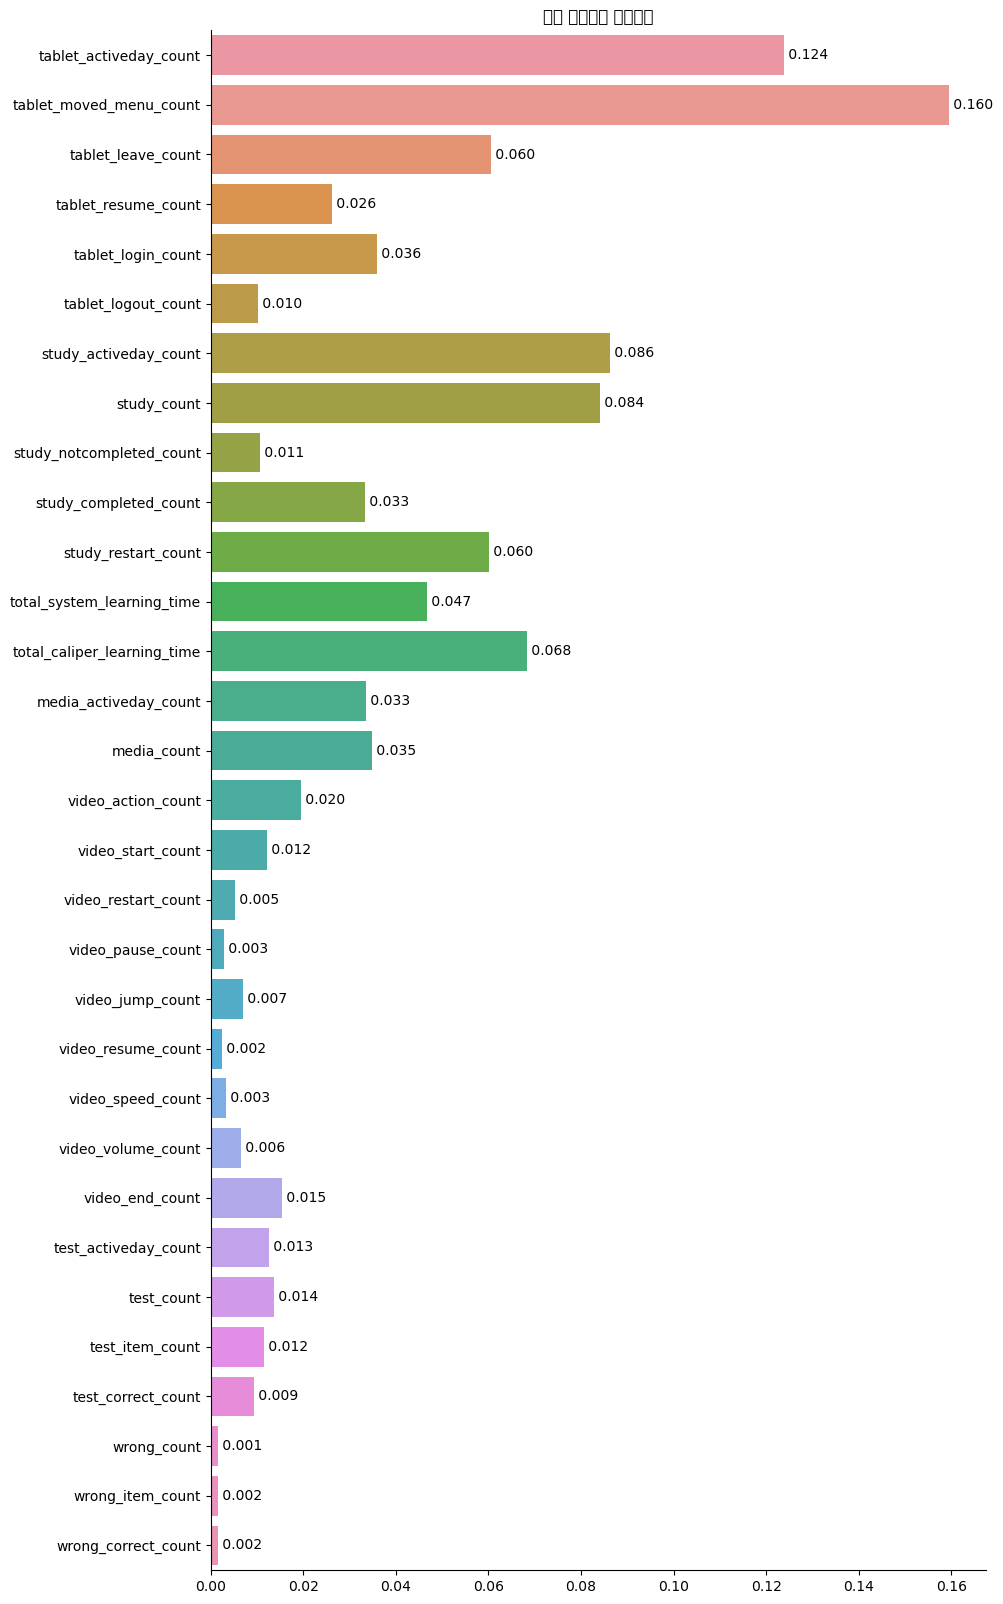

In [68]:
plt.figure(figsize=(10, 20))
ax = sns.barplot(x=clf.feature_importances_, y=df_under_50.columns[20:51])
ax.bar_label(ax.containers[0], fmt=" %.3f")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.title("만료 유지기간 예측모델")
plt.show()

In [69]:
y_pred = clf.predict(x_test)
mat = metrics.confusion_matrix(y_test, y_pred, labels=[True, False])
pd.DataFrame(mat, columns=["d", "n"], index=["dt", "nt"])

,d,n
dt,5641,1295
nt,931,14066


ada

In [70]:
ada = AdaBoostClassifier(random_state=12345)
ada.fit(x_train, y_train)

AdaBoostClassifier(random_state=12345)

In [71]:
ada.score(x_train, y_train)

0.8960993069487507

In [72]:
ada.score(x_test, y_test)

0.895363151415675

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

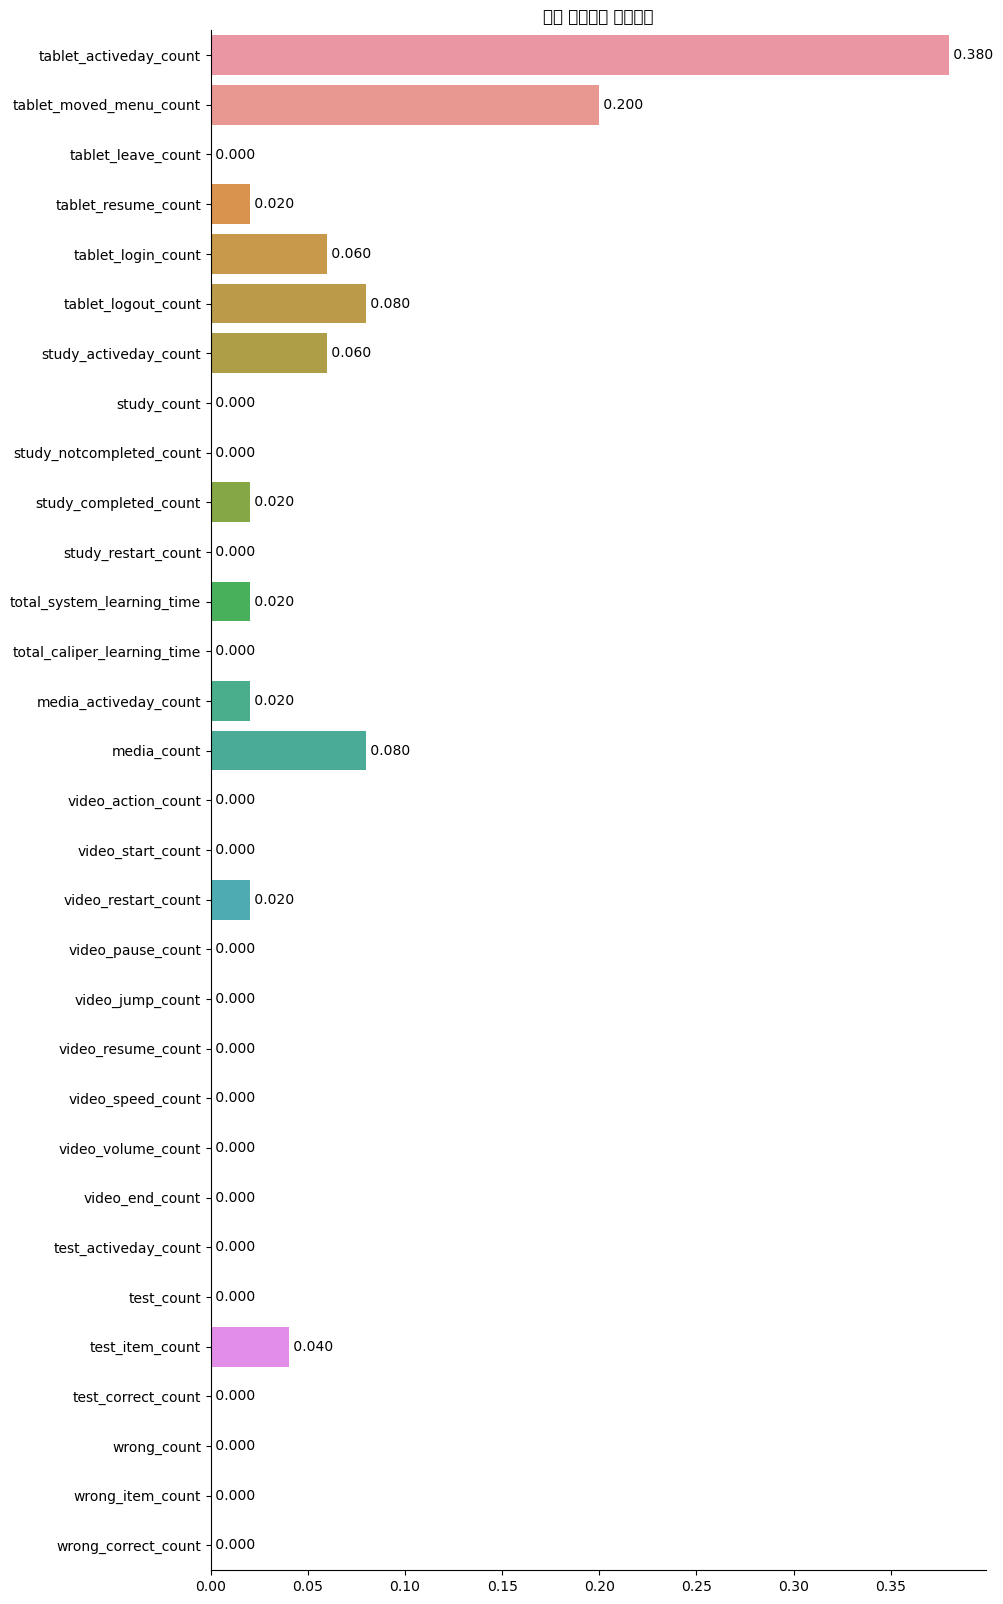

In [73]:
plt.figure(figsize=(10, 20))
ax = sns.barplot(x=ada.feature_importances_, y=df_under_50.columns[20:51])
ax.bar_label(ax.containers[0], fmt=" %.3f")
plt.gca().spines[["right", "top"]].set_visible(False)
plt.title("만료 유지기간 예측모델")
plt.show()

In [74]:
y_pred = ada.predict(x_test)
mat = metrics.confusion_matrix(y_test, y_pred, labels=[True, False])
pd.DataFrame(mat, columns=["d", "n"], index=["dt", "nt"])

,d,n
dt,5747,1189
nt,1106,13891


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

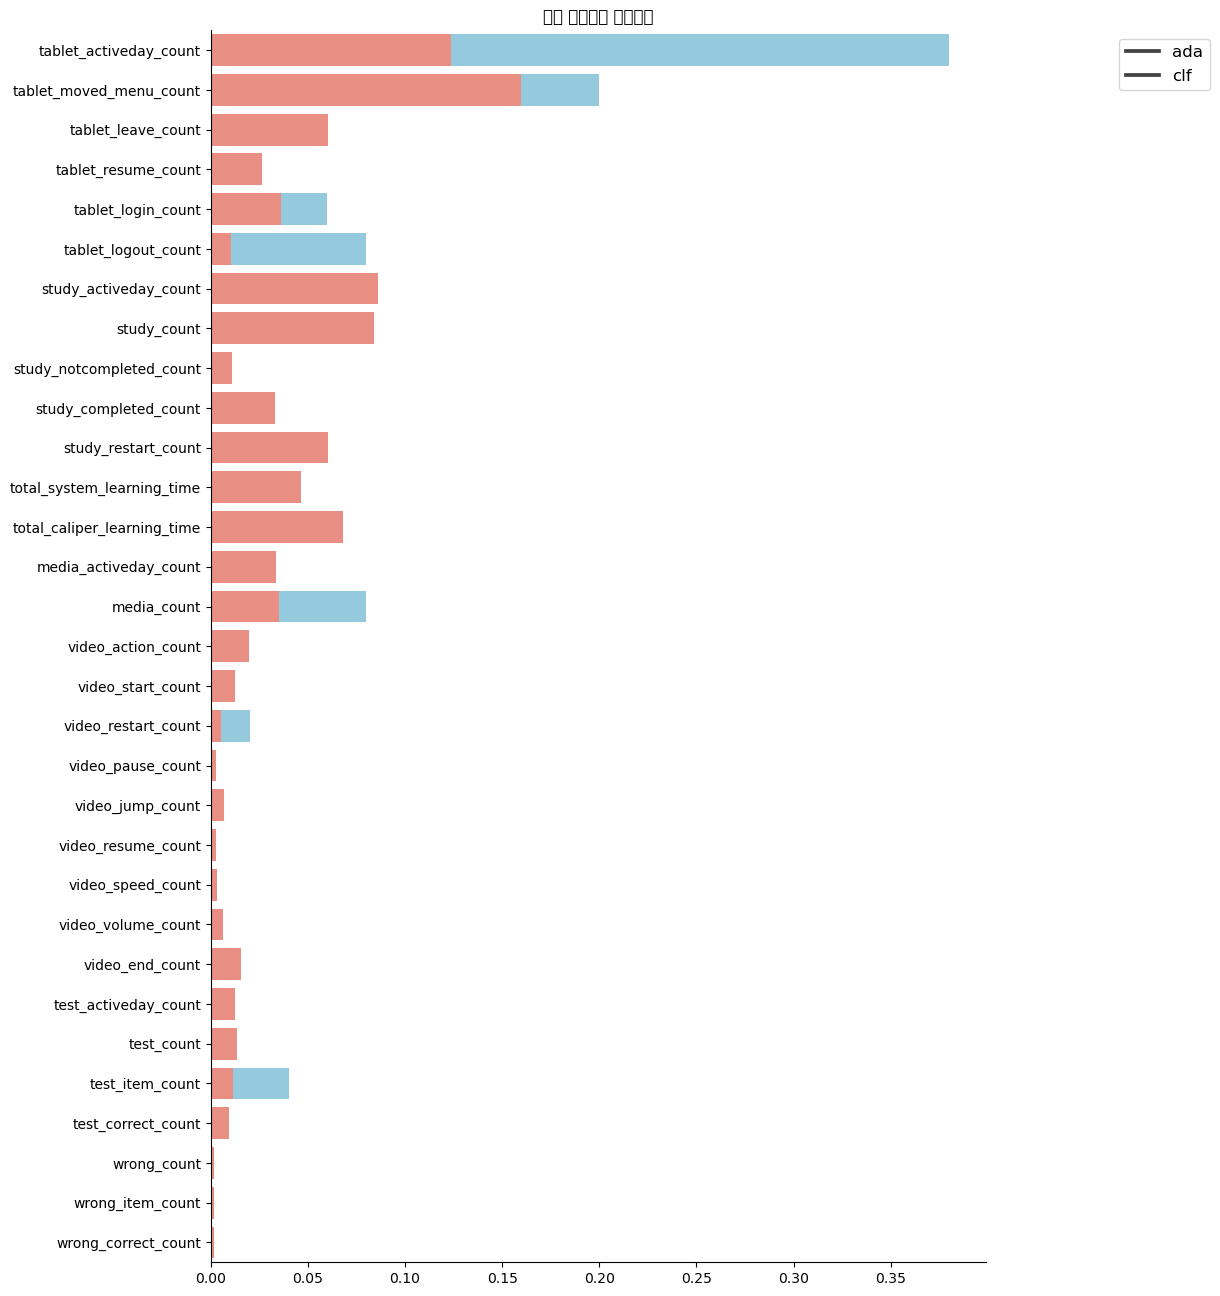

In [75]:
plt.figure(figsize=(10, 16))

# 첫 번째 막대그래프
ax = sns.barplot(
    x=ada.feature_importances_,
    y=df_under_50.columns[20:51],
    color="skyblue",
    label="Model 1",
)

# 두 번째 막대그래프 (겹쳐서 그리기 위해서 같은 축을 사용합니다)
sns.barplot(
    x=clf.feature_importances_,
    y=df_under_50.columns[20:51],
    color="salmon",
    label="Model 2",
    ax=ax,
)

# 오른쪽과 위쪽의 축(spines)을 숨김
plt.gca().spines[["right", "top"]].set_visible(False)

# 범례 추가 및 위치 설정
plt.legend(["ada", "clf"], loc="upper right", bbox_to_anchor=(1.3, 1), fontsize=12)

# 그래프 제목 설정
plt.title("만료 유지기간 예측모델")

# 그래프 출력
plt.show()